# Quantify mCG at the enhancers

In [1]:
import sys, os
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
from __init__ import *
from CEMBA_run_mc_region_level import run_mc_region_level 
from natsort import natsorted
import glob , re

In [2]:
# bed_file='enhancers_reptile.bed'
# allc_dir='/cndd2/fangming/scf_enhancers/data/bulk/round2/mc/'
# allc_files=glob.glob(allc_dir+'Round2*CGN-Merge.allc.tsv.gz')

# # bed_file='foo.bed'
# # allc_files = [allc_files[0]]

# output_files = ['enh.'+os.path.split(a)[1][:-22]+'.bed.gz' for a in allc_files]
# cap = 0 # no counts cap
# nprocs = 8
# compress = True
# bed_file_name_column = False
# chr_prefix = True
# contexts = ['CG']

# run_mc_region_level(allc_files, 
#                     output_files, 
#                     bed_file, 
#                     chr_prefix=chr_prefix,
#                     bed_file_name_column=bed_file_name_column,
#                     contexts=contexts,
#                     compress=compress, 
#                     cap=cap,
#                     nprocs=nprocs);

In [3]:
# # Gather data from all the individual bed files
# df = pd.DataFrame();
# for fn in output_files:
    
#     _, sample = os.path.split(fn)
#     sample = re.sub('(enh\.|\.bed)','',sample)

#     x = pd.read_csv(fn+'.gz',sep='\t')
#     x=x.rename(mapper={'mCG': sample+'_'+'mCG', 'CG': sample+'_'+'CG'}, axis=1)
#     if df.shape[0]<1:
#         df = x
#     else:
#         df = df.join(x.iloc[:,[3,4]])
        
# df['enh_pos'] = 'chr'+df['chr'].astype(str)+'_'+df['start'].astype(str)+'_'+df['end'].astype(str)

In [4]:
# df.to_csv('enh.AllClusters.mCG.bed.gz')

In [5]:
# for fn in output_files:
#     os.remove(fn)
#     print('Removed file %s' % fn)

# Load enhancer data

In [6]:
# Map the genes to closest enhancers
datadir = '/cndd/emukamel/enhancer_modeling/enhancer_data/'
genes2enh = pd.read_csv(datadir+'genes.gencode.vM16.closest_enhancers.bed',sep='\t',
                        names = ['gene_chr','gene_start','gene_end','ensid','gene_name','enh_chr','enh_start','enh_end'])

In [7]:
genes2enh['enh_pos'] = genes2enh['enh_chr']+'_'+genes2enh['enh_start'].astype(str)+'_'+genes2enh['enh_end'].astype(str)

In [8]:
genes2enh.ensid = [re.sub("\..*","",x) for x in genes2enh.ensid]
genes2enh = genes2enh.set_index('ensid')

In [9]:
genes = pd.read_csv(datadir+'genes.gencode.vM16.bed',sep='\t',header=None,
                   names=['chr','start','end','ensid','gene'])
genes['ensid'] = [re.sub('\..*','',ensid) for ensid in genes['ensid']]
genes = genes.set_index('ensid',drop=False)
genes

,chr,start,end,ensid,gene
ensid,,,,,
ENSMUSG00000102693,chr1,3073253,3074322,ENSMUSG00000102693,4933401J01Rik
ENSMUSG00000064842,chr1,3102016,3102125,ENSMUSG00000064842,Gm26206
ENSMUSG00000051951,chr1,3205901,3671498,ENSMUSG00000051951,Xkr4
ENSMUSG00000102851,chr1,3252757,3253236,ENSMUSG00000102851,Gm18956
ENSMUSG00000103377,chr1,3365731,3368549,ENSMUSG00000103377,Gm37180
...,...,...,...,...,...
ENSMUSG00000095134,chrY,90753057,90763485,ENSMUSG00000095134,Mid1-ps1
ENSMUSG00000095366,chrY,90754513,90754821,ENSMUSG00000095366,Gm21860
ENSMUSG00000096768,chrY,90784738,90816464,ENSMUSG00000096768,Erdr1


# Load RNA data

In [10]:
datadir='/cndd2/ethan/projects/scf_paper/modeling/working_data/reptile/data_for_model_01152020/'
rna = pd.read_csv(datadir+'rna_for_y_values.tsv',sep='\t')
rcol = rna.columns.values
rcol[1] = 'ensid'
rna.columns = rcol
# rna=rna.drop('10-1',axis=1)
# rna_data = rna.iloc[:,2:].to_numpy()

# Variable genes
hvg = np.var(rna.iloc[:,2:].to_numpy(),axis=1);
hvg = hvg> np.percentile(hvg,67)
np.sum(hvg)

rna = rna[hvg]

In [11]:
rna = rna.set_index('ensid')

In [12]:
rna

,Unnamed: 0,1-1,1-2,10-1,2-1,2-2,2-3,3-1,3-2,3-3,...,6-4,6-5,6-6,7-1,7-2,8-1,8-2,8-3,9-1,9-2
ensid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845,3,0.657331,0.790549,0.844893,0.671721,0.742243,0.670383,0.747534,0.740225,0.845741,...,0.762219,0.929410,0.906570,0.700118,0.494011,0.829614,0.874710,0.856605,0.656757,0.851474
ENSMUSG00000002459,7,0.258922,0.344457,0.175829,0.316700,0.354082,0.149117,0.336292,0.312618,0.767877,...,0.185391,0.305721,0.051356,0.090074,0.030315,0.663958,0.993056,0.372695,0.193770,0.260865
ENSMUSG00000025905,9,0.136561,0.108842,0.526296,0.189858,0.342191,0.061733,0.961831,0.034771,1.900455,...,0.036889,0.133737,0.051880,0.019909,0.010084,0.009210,0.052577,0.000000,0.011878,0.019870
ENSMUSG00000033774,10,0.111425,0.318002,0.000000,0.009585,0.026338,0.015591,0.330171,0.039927,1.410491,...,0.012966,0.000000,0.000000,0.000000,0.000000,0.021722,0.025958,0.000000,0.000000,0.087800
ENSMUSG00000061024,16,1.217938,1.360490,1.409640,1.195739,1.251412,1.229159,1.277752,1.329354,1.496509,...,1.389121,1.736209,1.563332,1.187830,1.052605,1.417544,1.492727,1.461143,1.176032,1.412388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000024991,19728,0.882543,1.093347,1.131439,0.926237,1.043946,0.903308,1.012635,1.061728,1.172044,...,0.993926,1.222741,1.247297,0.938480,0.789043,1.154754,1.199614,1.180283,0.888282,1.010335
ENSMUSG00000024993,19729,0.563671,0.664255,0.862088,0.566628,0.694458,0.561623,0.622723,0.607845,0.749253,...,0.813935,0.965713,0.973769,0.683047,0.541528,0.772073,0.796485,0.781906,0.429679,0.598794
ENSMUSG00000024997,19731,0.723332,0.875230,1.449857,1.027667,1.142799,1.018407,1.018537,1.025598,1.121739,...,1.038384,1.204105,1.334259,1.085549,0.852036,1.187474,1.235218,1.228676,1.144225,1.232963


# Load mCG data

In [28]:
datadir = '/cndd/emukamel/enhancer_modeling/enhancer_data/'
df = pd.read_csv(datadir+'enh.AllClusters.mCG.bed.gz')
df['enh_pos'] = 'chr'+df['chr'].astype(str)+'_'+df['start'].astype(str)+'_'+df['end'].astype(str)
df = df.drop(['Unnamed: 0'],axis=1)
df

/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chr,start,end,Round2.3-3_mCG,Round2.3-3_CG,Round2.8-2_mCG,Round2.8-2_CG,Round2.2-1_mCG,Round2.2-1_CG,Round2.6-1_mCG,...,Round2.5-5_CG,Round2.2-2_mCG,Round2.2-2_CG,Round2.6-4_mCG,Round2.6-4_CG,Round2.4-1_mCG,Round2.4-1_CG,Round2.6-2_mCG,Round2.6-2_CG,enh_pos
0,1,3083769,3083816,1,1,5,5,31,32,13,...,0,18,20,2,3,15,16,13,14,chr1_3083769_3083816
1,1,3112234,3112467,15,16,27,28,304,315,57,...,0,174,177,15,67,149,164,37,118,chr1_3112234_3112467
2,1,3112770,3112986,0,0,1,4,49,53,7,...,0,30,33,1,10,24,33,6,18,chr1_3112770_3112986
3,1,3113717,3114035,8,14,9,16,35,206,44,...,3,16,125,15,59,55,115,10,95,chr1_3113717_3114035
4,1,3118790,3118935,12,14,2,2,93,130,21,...,0,46,56,14,29,42,89,5,48,chr1_3118790_3118935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302091,X,169890644,169890829,2,2,10,10,62,70,0,...,0,39,40,2,16,30,37,1,43,chrX_169890644_169890829
302092,X,169918008,169918093,2,2,3,3,26,26,0,...,0,14,15,0,5,6,6,5,7,chrX_169918008_169918093
302093,X,169927115,169927682,6,35,75,79,243,709,44,...,5,306,412,89,94,204,417,318,340,chrX_169927115_169927682
302094,X,169935048,169935204,3,3,8,9,45,48,17,...,0,31,32,7,7,27,30,25,28,chrX_169935048_169935204


In [29]:
# Compute mCH level
cg = df.iloc[:,3:-1:2]
mcg = df.iloc[:,4:-1:2]
mlevel = mcg.to_numpy() / cg.to_numpy()
hthresh = 10
mlevel[ cg<hthresh ] = np.nan

df_mlevel = pd.DataFrame(mlevel, columns = cg.columns, index=df.enh_pos)

/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [30]:
celltypes = df_mlevel.columns
celltypes = [re.sub("(Round2\.|_mCG)","",c) for c in celltypes]
df_mlevel.columns = celltypes

In [31]:
# Cell type names
df_cellnames = pd.read_csv('/cndd/Public_Datasets/CEMBA/BICCN_minibrain_data/data_freeze/supp_info/clusters_final/cluster_annotation_scf_round2.tsv',
                       sep='\t', index_col='cluster')

In [32]:
celltypes_label = df_cellnames.loc[celltypes,'annot']

# Load ATAC data

In [33]:
atac = pd.read_csv(datadir+'enhancers_reptile_atac_norm.tsv',sep='\t')
atac=atac.set_index('enhancer_idx',drop=False)
atac_enh_list = pd.read_csv(datadir+'enhancers_reptile.bed',sep='\t',header=None,names=['chr','start','end'])
atac = atac.join(atac_enh_list)
atac['enh_pos'] = atac['chr'].astype(str)+'_'+atac['start'].astype(str)+'_'+atac['end'].astype(str)
atac = atac.loc[~(atac['chr']=="chrY")]
df_atac = atac.set_index('enh_pos',drop=False)

In [34]:
# Make sure the ATAC and mCG data are both in the same column order
df_atac = df_atac[celltypes]
df_mlevel = df_mlevel[celltypes]

# Define features

In [35]:
# For each gene, pull all corresponding enhancers
# Get the mean, var etc. of mCG and ATAC levels over all enhancers for each cell type
# This takes ~30 s, so be patient...
features = []
tstart = time.time()
for ensid,r in rna.iterrows():
    curr_enh = genes2enh.loc[ensid]['enh_pos'].values
    
    ml = df_mlevel.loc[curr_enh].values
    ml_mean = np.nanmean(ml,axis=0)
    ml_var = np.nanvar(ml,axis=0)
    ml_max = np.nanmax(ml,axis=0)
    ml_min = np.nanmin(ml,axis=0)
    
    at = df_atac.loc[curr_enh].values
    at_mean = np.nanmean(at,axis=0)
    at_var = np.nanvar(at,axis=0)
    at_max = np.nanmax(at,axis=0)
    at_min = np.nanmin(at,axis=0)
    
    f = np.vstack((ml_mean, ml_var, ml_max,ml_min,
                  at_mean, at_var, at_max,at_min,))
    features.append(f)

print(time.time() - tstart)

/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice.
  # This is added back by InteractiveShellApp.init_path()
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: All-NaN slice encountered
  if sys.path[0] == '':
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: All-NaN slice encountered
  del sys.path[0]
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Degrees of freedom <= 0 for slice.
/cndd/emukamel/conda_envs/scanpy/lib/p

74.91380453109741


In [43]:
farray = np.dstack(features)

In [44]:
features_labels = ['mCG mean','mCG var','mCG max','mCG min',
                   'ATAC mean','ATAC var','ATAC max','ATAC min',]

In [45]:
celltypes = df_mlevel.columns
celltypes = [re.sub("(Round2\.|_mCG)","",c) for c in celltypes]

In [67]:
farray.shape

(8, 29, 6513)

# Regression

In [46]:
import sklearn.linear_model as sklm
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler

In [47]:
# For each cell type, correlate the RNA expression with the mean mCG level of all enhancers associated to that gene
cc_mean = []
for celltype_use in celltypes:
    y = rna[celltype_use]
    X = farray[0,celltypes.index(celltype_use),:].squeeze().T
    X.shape, y.shape

    goodgenes = np.isnan(X)==0

    X = X[goodgenes]
    y = y[goodgenes]
    
    cc_mean.append(np.corrcoef(y, X)[0,1])

In [48]:
# For each cell type, regress the RNA expression against mCG features
cc_features = []
coefs = []
for celltype_use in celltypes:
    y = rna[celltype_use]
    X = farray[:,celltypes.index(celltype_use),:].squeeze().T
    X2 = np.nanmedian(farray,axis=1).squeeze().T
    X = np.hstack((X,X2))
    
    goodgenes = np.isnan(X).sum(axis=1)==0
#     print(goodgenes.sum())
    if goodgenes.sum()>100:
        X = X[goodgenes,:]
        y = y[goodgenes]

        #X = scipy.stats.zscore(X, nan_policy='omit')
        X = StandardScaler().fit_transform(X)
        
        regr = sklm.LinearRegression(normalize=False).fit(X,y)

        coefs.append(regr.coef_)
        cc_features.append(np.corrcoef(y, regr.predict(X))[0,1])
    else:
        cc_features.append(np.nan)

Text(0, 0.5, 'Correlation coefficient')

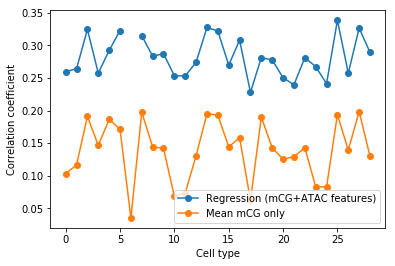

In [49]:
plt.plot(cc_features,'o-',label='Regression (mCG+ATAC features)')
plt.plot(cc_mean,'o-',label='Mean mCG only')
plt.legend()
plt.xlabel('Cell type')
plt.ylabel('Correlation coefficient')

In [54]:
features_labels_use = features_labels+[f+' all' for f in features_labels]
features_labels_use

['mCG mean',
 'mCG var',
 'mCG max',
 'mCG min',
 'ATAC mean',
 'ATAC var',
 'ATAC max',
 'ATAC min',
 'mCG mean all',
 'mCG var all',
 'mCG max all',
 'mCG min all',
 'ATAC mean all',
 'ATAC var all',
 'ATAC max all',
 'ATAC min all']

Text(0.5, 1.0, 'Regression coefficients')

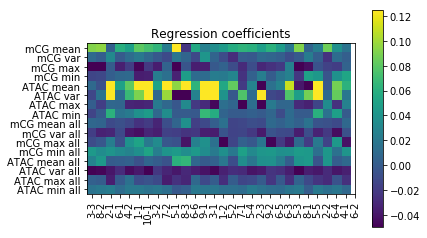

In [56]:
# plt.bar(np.broadcast_to(np.array(features_labels_use).reshape(-1,1), (16,28) ), np.array(coefs).T)
plt.imshow(np.array(coefs).T, vmin=-.05,vmax=.125)
plt.xticks(ticks=np.arange(len(celltypes)), labels=celltypes, rotation=90);
plt.yticks(ticks=np.arange(len(features_labels_use)), labels=features_labels_use);
# plt.yticks(ticks=features_labels_use)
plt.colorbar();
plt.title('Regression coefficients')

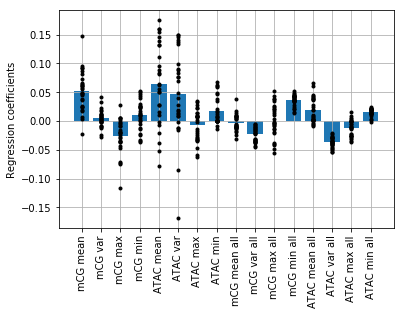

In [58]:
plt.bar(features_labels_use, np.array(coefs).mean(axis=0))
plt.plot(features_labels_use, np.array(coefs).T,'k.')
plt.xticks(ticks=np.arange(len(features_labels_use)), labels=features_labels_use,
          rotation=90);
plt.ylabel('Regression coefficients')
plt.grid()

In [59]:
_, ncelltypes, ngenes = farray.shape
X = farray.reshape(-1,ngenes*ncelltypes).T
y = rna[celltypes].to_numpy().reshape(ngenes*ncelltypes,1)
X.shape, farray.shape

((188877, 8), (8, 29, 6513))

In [60]:
# Formula based linear modeling
import statsmodels.formula.api as smf

In [61]:
f0 = np.nanmean(farray,axis=2)
fv = np.nanvar(farray,axis=2)
fz = farray-f0[:,:,np.newaxis]
fz = fz / fv[:,:,np.newaxis]

# fz = farray

/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice.
  
/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [62]:
# Gather all data into a big DF
data = rna.iloc[:,1:].stack()
data = pd.DataFrame(data, columns=['rna'])

for i,f in enumerate(features_labels):
    d = pd.DataFrame(fz[i,:,:].T, index=rna.index, columns=celltypes)
    d = d.stack()
    d = pd.DataFrame(d, columns=[f])
    data = data.join(d)

data = data.reset_index()
data = data.rename(mapper={'level_1': 'celltype'},axis=1)
dc = data.columns
dc = [re.sub(' ','_',dc1) for dc1 in dc]
data.columns = dc
data = data.loc[data.celltype!="10-1"]

In [63]:
dataz = StandardScaler().fit_transform(data.values[:,2:])
dataz = pd.DataFrame(dataz, index = data.index, columns=data.columns[2:])
dataz['ensid'] = data['ensid']
dataz['celltype'] = data['celltype']
dataz

,rna,mCG_mean,mCG_var,mCG_max,mCG_min,ATAC_mean,ATAC_var,ATAC_max,ATAC_min,ensid,celltype
0,0.136848,-0.220642,-0.002757,-0.156685,-0.009871,0.860174,-0.601347,0.277791,0.288879,ENSMUSG00000033845,1-1
1,0.426531,0.135709,0.001303,0.058772,-0.292287,0.626582,-0.697673,0.132048,0.317226,ENSMUSG00000033845,1-2
3,0.168139,-0.211405,-0.004069,-0.107020,-0.012148,0.178103,-0.794593,-1.723740,0.334059,ENSMUSG00000033845,2-1
4,0.321488,-0.449799,-0.008976,-0.211301,-0.264578,-0.627634,0.399987,-2.351163,-0.409601,ENSMUSG00000033845,2-2
5,0.165229,-0.295992,-0.009191,-0.124874,-0.137438,-0.202232,0.733388,-0.833156,-0.199830,ENSMUSG00000033845,2-3
...,...,...,...,...,...,...,...,...,...,...,...
188872,1.917678,0.078364,-0.042711,-0.277696,0.002437,-0.899682,-1.158470,-0.702891,NaN,ENSMUSG00000059326,8-1
188873,1.948814,-0.630756,-0.079099,-0.466541,-0.153074,0.058215,0.201572,0.079389,NaN,ENSMUSG00000059326,8-2
188874,0.796132,NaN,NaN,NaN,NaN,-0.791022,-0.420234,-0.092309,NaN,ENSMUSG00000059326,8-3
188875,0.516844,-0.683973,-0.100859,-0.736398,0.008484,-0.860878,1.070477,-0.633820,-0.213580,ENSMUSG00000059326,9-1


In [64]:
formula = 'rna ~ 1+celltype'
for c in data.columns[3:]:
    formula += '+'+c
    
# formula = 'rna ~ 1+celltype+mCG_mean+mCG_max+ATAC_mean+ATAC_var'
print(formula)
mdl = smf.ols(formula, dataz).fit()
mdl.summary()

rna ~ 1+celltype+mCG_mean+mCG_var+mCG_max+mCG_min+ATAC_mean+ATAC_var+ATAC_max+ATAC_min


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rna   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     419.9
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:02:05   Log-Likelihood:            -1.8503e+05
No. Observations:              136067   AIC:                         3.701e+05
Df Residuals:                  136038   BIC:                         3.704e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1198      0.012    -10.256      0.000      -0.143      -0.097
celltype[T.1-2]     0.2507      0.017     15.176      0.000       0.218       0.283
celltype[T.2-1]     0.0151      0.017      0.914      0.361      -0.017       0.047
celltype[T.2-2]     0.1791      0.017     10.840      0.000       0.147       0.211
celltype[T.2-3]    -0.0165      0.017     -1.000      0.317      -0.049       0.016
celltype[T.3-1]     0.1565      0.017      9.472      0.000       0.124       0.189
celltype[T.3-2]     0.1645      0.017      9.957      0.000       0.132       0.197
celltype[T.3-3]     0.3343      0.017     19.903      0.000       0.301       0.367
celltype[T.4-1]    -0.1058      0.017     -6.403      0.000      -0.138      -0.073
celltype[T.4-2]    -0.2239      0.017    -13.551      0.000      -0.256      -0.191
celltype[T.5-1]    -0.0401      0.017     -2.426      0.015      -0.072      -0.008
celltype[T.5-2]     0.2803      0.017     16.966      0.000       0.248       0.313
celltype[T.5-3]     0.0727      0.017      4.403      0.000       0.040       0.105
celltype[T.5-4] -1.255e-16   6.13e-18    -20.483      0.000   -1.38e-16   -1.13e-16
celltype[T.5-5] -9.766e-17   8.01e-18    -12.185      0.000   -1.13e-16    -8.2e-17
celltype[T.6-1]     0.0505      0.017      3.058      0.002       0.018       0.083
celltype[T.6-2]     0.2493      0.017     15.092      0.000       0.217       0.282
celltype[T.6-3]     0.1240      0.017      7.504      0.000       0.092       0.156
celltype[T.6-4]     0.1118      0.017      6.768      0.000       0.079       0.144
celltype[T.6-5]     0.4057      0.017     24.552      0.000       0.373       0.438
celltype[T.6-6]  1.132e-17    2.1e-18      5.389      0.000    7.21e-18    1.54e-17
celltype[T.7-1]     0.0073      0.017      0.445      0.656      -0.025       0.040
celltype[T.7-2]    -0.2104      0.017    -12.729      0.000      -0.243      -0.178
celltype[T.8-1] -2.986e-17   2.05e-18    -14.535      0.000   -3.39e-17   -2.58e-17
celltype[T.8-2]  4.302e-17    2.4e-18     17.960      0.000    3.83e-17    4.77e-17
celltype[T.8-3] -1.765e-17   1.61e-18    -10.934      0.000   -2.08e-17   -1.45e-17
celltype[T.9-1]    -0.1207      0.017     -7.230      0.000      -0.153      -0.088
celltype[T.9-2]  2.752e-19   3.22e-18      0.086      0.932   -6.03e-18    6.58e-18
mCG_mean            0.1437      0.005     27.995      0.000       0.134       0.154
mCG_var            -0.0448      0.024     -1.905      0.057      -0.091       0.001
mCG_max            -0.1236      0.009    -13.439      0.000      -0.142      -0.106
mCG_min             0.0510      0.003     18.787      0.000       0.046       0.056
ATAC_mean           0.2491      0.006     43.801      0.000       0.238       0.260
ATAC_var            0.0381      0.004      9.785      0.000

In [92]:
goodgenes = np.isnan(X).sum(axis=1)==0
X = X[goodgenes,:]
y = y[goodgenes]

In [93]:
X.shape,y.shape

((102015, 8), (102015, 1))

In [527]:
regr = sklm.LinearRegression(normalize=False).fit(X,y)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

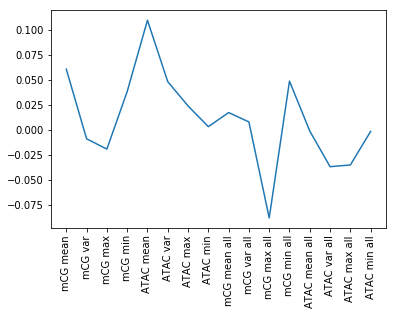

In [88]:
plt.plot(features_labels_use, regr.coef_)
plt.xticks(rotation=90)

In [534]:
yhat = regr.predict(X)
yhat.shape

(51206, 1)

In [538]:
np.corrcoef(y.T, regr.predict(X).T)

array([[1.        , 0.04739124],
       [0.04739124, 1.        ]])

# Reduced rank regression



In [34]:
# Code from: https://github.com/riscy/machine_learning_linear_models/blob/master/reduced_rank_regressor.py
from scipy import sparse

class ReducedRankRegressor(object):
    """
    Reduced Rank Regressor (linear 'bottlenecking' or 'multitask learning')
    - X is an n-by-d matrix of features.
    - Y is an n-by-D matrix of targets.
    - rrank is a rank constraint.
    - reg is a regularization parameter (optional).
    """
    def __init__(self, X, Y, rank, reg=None):
        if np.size(np.shape(X)) == 1:
            X = np.reshape(X, (-1, 1))
        if np.size(np.shape(Y)) == 1:
            Y = np.reshape(Y, (-1, 1))
        if reg is None:
            reg = 0
        self.rank = rank

        CXX = np.dot(X.T, X) + reg * sparse.eye(np.size(X, 1))
        CXY = np.dot(X.T, Y)
        _U, _S, V = np.linalg.svd(np.dot(CXY.T, np.dot(np.linalg.pinv(CXX), CXY)))
        self.W = V[0:rank, :].T
        self.A = np.dot(np.linalg.pinv(CXX), np.dot(CXY, self.W)).T

    def __str__(self):
        return 'Reduced Rank Regressor (rank = {})'.format(self.rank)

    def predict(self, X):
        """Predict Y from X."""
        if np.size(np.shape(X)) == 1:
            X = np.reshape(X, (-1, 1))
        return np.dot(X, np.dot(self.A.T, self.W.T))

In [36]:
Y = rna.values[:,1:]
X = farray.reshape(-1,ngenes).T

# Remove predictors with too many nan values
goodpredictors = np.sum(np.isnan(X),axis=0)<500
X = X[:,goodpredictors]

goodgenes = np.sum(np.isnan(X),axis=1)==0
X = X[goodgenes,:]
Y = Y[goodgenes,:]
X.shape, Y.shape

((3560, 208), (3560, 29))

In [49]:
cc = []
tstart = time.time()
ranks = [1,2,5,10,20]
for rank in ranks:
    regr = ReducedRankRegressor(X,Y,rank)
    Yhat = regr.predict(X)
    cc1 = [np.corrcoef(Y[:,i].T,Yhat[:,i].T)[0,1] for i in range(Y.shape[1])]
    cc.append(cc1)
    print('Rank=%d, time=%3.3f' % (rank, time.time()-tstart))
cc = np.array(cc)

Rank=1, time=1.063
Rank=2, time=2.055
Rank=5, time=2.485
Rank=10, time=3.402
Rank=20, time=3.674


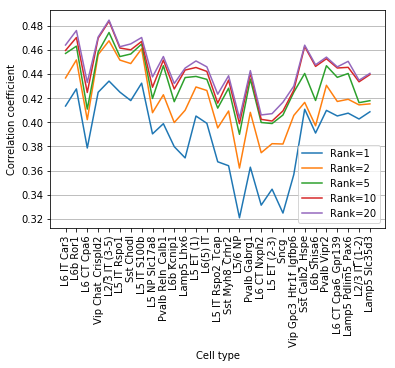

In [76]:
plt.plot(celltypes_label, cc.T);
plt.legend(['Rank='+str(r) for r in ranks])
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=90);
plt.xlabel('Cell type');
plt.grid(axis='y')

# Kmers

In [179]:
# Get fasta file
import scipy
import sklearn
from matplotlib import pyplot as plt

In [285]:
kdict=np.load(datadir+'kmers_6mers/kmer_dict.npy', allow_pickle=True)

In [ ]:
# Load the kmer data per enhancer
kmer_counts=np.load(datadir+'kmers_6mers/count.npy')
kdict=np.load(datadir+'kmers_6mers/kmer_dict.npy')

In [194]:
kmer_enh = pd.read_csv(datadir+'enhancers_reptile.bed', sep='\t', 
                       header=None, columns=['chr','start','end'])
kmer_enh['enh_pos'] = ['_'.join([str(i) for i in row]) for ind,row in kmer_enh.iterrows()]

In [195]:
kmer_enh['enh_num'] = np.arange(kmer_enh.shape[0])

In [286]:
kmer_enh = kmer_enh.set_index('enh_pos', drop=False)
kmer_enh, kmer_counts.shape

(                         chr     start       end                 enh_pos  \
 enh_pos                                                                    
 chr1_3083769_3083816    chr1   3083769   3083816    chr1_3083769_3083816   
 chr1_3112234_3112467    chr1   3112234   3112467    chr1_3112234_3112467   
 chr1_3112770_3112986    chr1   3112770   3112986    chr1_3112770_3112986   
 chr1_3113717_3114035    chr1   3113717   3114035    chr1_3113717_3114035   
 chr1_3118790_3118935    chr1   3118790   3118935    chr1_3118790_3118935   
 ...                      ...       ...       ...                     ...   
 chrY_90798757_90798825  chrY  90798757  90798825  chrY_90798757_90798825   
 chrY_90799559_90800504  chrY  90799559  90800504  chrY_90799559_90800504   
 chrY_90804088_90805373  chrY  90804088  90805373  chrY_90804088_90805373   
 chrY_90808309_90809280  chrY  90808309  90809280  chrY_90808309_90809280   
 chrY_90809398_90809664  chrY  90809398  90809664  chrY_90809398_90809664   

In [256]:
# Subset to the HVGs
genes2enhu = genes2enh.loc[rna.index]

((643003, 9), (62698, 9))

In [258]:
# Determine the enhancer number for each gene-enhancer pair
genes2enhu['enh_num'] = kmer_enh.loc[genes2enhu['enh_pos'],'enh_num'].values

In [268]:
kmer_countsu = kmer_counts[genes2enhu['enh_num'],:]

In [278]:
df_mlevelu = df_mlevel.loc[genes2enhu['enh_pos']]
df_atacu = df_atac.loc[genes2enhu['enh_pos']]

In [281]:
kmer_countsu.shape, df_mlevelu.shape, df_atacu.shape

((62698, 2080), (62698, 29), (62698, 29))

In [271]:
rna.shape, kmer_countsu.shape

((3947, 30), (62698, 2080))

In [203]:
ensid = 'ENSMUSG00000067879'

y = rna.loc[ensid,:]

curr_enh = genes2enh.loc[ensid]['enh_pos'].values
curr_enh_num = kmer_enh.loc[curr_enh,'enh_num']
curr_kmers = kmer_counts[curr_enh_num,:]
curr_atac = df_atac.loc[curr_enh,:]
curr_mcg = df_mlevel.loc[curr_enh,:]
curr_kmers.shape, curr_atac.shape, curr_mcg.shape

((16, 2080), (16, 29), (16, 29))

In [190]:
mdl = sklearn.linear_model.ElasticNet()

In [176]:
curr_enh = genes2enh.loc[ensid]['enh_pos'].values
curr_enh

array(['chr1_9600895_9601215', 'chr1_9601672_9602769',
       'chr1_9603518_9603645', 'chr1_9603949_9604497',
       'chr1_9604950_9605379', 'chr1_9606588_9606632',
       'chr1_9608532_9608781', 'chr1_9609160_9609657',
       'chr1_9610728_9611092', 'chr1_9611610_9611947',
       'chr1_9615274_9615319', 'chr1_9615817_9615871',
       'chr1_9619277_9620030', 'chr1_9620609_9620994',
       'chr1_9622397_9622717', 'chr1_9626162_9628129'], dtype=object)

In [55]:
# Link K-mers to genes
features = []
tstart = time.time()
for ensid,r in rna.iterrows():
    curr_enh = genes2enh.loc[ensid]['enh_pos'].values
    
    ml = df_mlevel.loc[curr_enh].values
    ml_mean = np.nanmean(ml,axis=0)
    ml_var = np.nanvar(ml,axis=0)
    

,gene_chr,gene_start,gene_end,gene_name,enh_chr,enh_start,enh_end,enh_pos
ensid,,,,,,,,
ENSMUSG00000102693,chr1,3073253,3074322,4933401J01Rik,chr1,3083769,3083816,chr1_3083769_3083816
ENSMUSG00000102693,chr1,3073253,3074322,4933401J01Rik,chr1,3112234,3112467,chr1_3112234_3112467
ENSMUSG00000102693,chr1,3073253,3074322,4933401J01Rik,chr1,3112770,3112986,chr1_3112770_3112986
ENSMUSG00000102693,chr1,3073253,3074322,4933401J01Rik,chr1,3113717,3114035,chr1_3113717_3114035
ENSMUSG00000102693,chr1,3073253,3074322,4933401J01Rik,chr1,3118790,3118935,chr1_3118790_3118935
...,...,...,...,...,...,...,...,...
ENSMUSG00000096850,chrY,90838869,90839177,Gm21748,chrY,90797432,90797435,chrY_90797432_90797435
ENSMUSG00000096850,chrY,90838869,90839177,Gm21748,chrY,90761427,90761479,chrY_90761427_90761479
ENSMUSG00000096850,chrY,90838869,90839177,Gm21748,chrY,1299513,1299714,chrY_1299513_1299714


# PyTorch

In [829]:
# Make sure all data frames have the cell types in the same order
enh_posu = genes2enhu['enh_pos'].unique()
df_mlevelu = df_mlevel.loc[enh_posu]
df_atacu = df_atac.loc[enh_posu]
df_mlevelu

,3-3,8-2,2-1,6-1,4-2,1-1,10-1,3-2,7-2,5-1,...,9-2,6-5,6-3,5-3,8-1,5-5,2-2,6-4,4-1,6-2
enh_pos,,,,,,,,,,,,,,,,,,,,,
chr1_4910714_4911306,NaN,1.187500,2.679688,1.500000,1.876923,6.387097,NaN,2.151515,1.415094,2.911504,...,1.708333,1.189189,1.181818,2.115385,1.083333,NaN,2.053763,1.102041,3.163934,1.115741
chr1_4917015_4917148,NaN,NaN,1.250000,NaN,NaN,1.666667,NaN,1.523810,NaN,1.090909,...,NaN,NaN,NaN,1.000000,NaN,NaN,1.400000,NaN,NaN,1.000000
chr1_4917475_4917862,NaN,1.533333,1.981818,1.000000,3.408451,2.560976,NaN,2.560000,1.181818,1.006024,...,NaN,1.000000,1.000000,1.034483,NaN,NaN,1.414634,1.031250,3.487179,1.010000
chr1_4923127_4924053,2.9375,1.583333,2.046196,1.335570,1.682624,2.138298,1.000000,1.970085,1.193103,1.098901,...,2.081081,1.030075,1.040936,1.079179,1.448980,NaN,1.773504,1.109244,1.717647,1.121739
chr1_4926747_4926815,NaN,NaN,1.000000,NaN,6.000000,1.555556,NaN,1.866667,NaN,1.272727,...,NaN,NaN,NaN,1.437500,NaN,NaN,1.208333,NaN,NaN,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19_61061083_61061181,NaN,NaN,1.065574,NaN,1.176471,1.222222,NaN,1.000000,1.153846,1.000000,...,NaN,NaN,NaN,1.105263,NaN,NaN,1.043478,NaN,1.333333,2.076923
chr19_61236418_61236699,1.7000,NaN,5.440000,1.321429,2.609756,2.350000,NaN,4.875000,1.157895,1.106870,...,NaN,1.129032,1.121212,1.425532,NaN,NaN,NaN,1.107143,5.090909,1.241935
chr19_61152259_61152407,NaN,NaN,3.055556,2.812500,4.909091,4.923077,NaN,4.130435,1.500000,2.509434,...,NaN,2.000000,2.428571,1.818182,NaN,NaN,2.500000,2.823529,6.642857,1.783784


In [830]:
rnau = rna.drop(['10-1','Unnamed: 0'],axis=1)
df_mlevelu = df_mlevelu.loc[:,rnau.columns]
df_atacu = df_atacu.loc[:,rnau.columns]
df_mlevelu  = df_mlevelu.drop_duplicates()
df_atacu = df_atacu.drop_duplicates()
assert( (rnau.columns==df_mlevelu.columns).all() )
assert( (rnau.columns==df_atacu.columns).all() )
df_mlevelu.shape, df_atacu.shape

((55515, 28), (55952, 28))

In [831]:
# Train a CNN regression to predict the mCG level of all DMRs
import pandas as pd
import csv
import numpy as np
import time
import matplotlib.pyplot as plt
# import seqlogo
# from IPython.display import clear_output
# import datetime
# from scipy.stats import spearmanr

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.cuda.is_available()

False

In [832]:
# Impute the NaN values in mlevel
df_mlevelu_mean = np.outer(df_mlevelu.median(axis=1).values, df_mlevelu.median(axis=0).values)
df_mlevelu_mean = pd.DataFrame(df_mlevelu_mean, index=df_mlevelu.index, columns=df_mlevelu.columns)
df_mlevelu_mean = df_mlevelu_mean.fillna(df_mlevelu.median())
df_mlevelu = df_mlevelu.fillna(df_mlevelu_mean)
assert(not df_mlevelu.isna().any(axis=None))
assert(not df_atacu.isna().any(axis=None))

/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [891]:
kmer_counts.shape, kmer_countsu.shape

((302106, 2080), (62698, 2080))

In [903]:
# Define the neural net architecture
nfilt = 10;
filt_width = 10
pool_size = 600

C = y.shape[1] # Number of cell types
K = kmer_countsu.shape[1] # Number of K-mers

def get_data(ensid):
    # For a list of ensids, return the x and y features
    x = []
    for i,ens in enumerate(ensid):
        curr_enh = genes2enhu.loc[ens,['enh_pos','enh_num']]
#         E = curr_enh.groupby('ensid').count().max(axis=0);
        mlu = df_mlevelu.loc[curr_enh['enh_pos']]
        atacu = df_atacu.loc[curr_enh['enh_pos']]
        kmeru = kmer_counts[curr_enh['enh_num']]
        Ne,Nk = kmeru.shape
        Nc = mlu.shape[1]
        kmeru = kmeru[:,np.newaxis,:]
        kmeru = np.broadcast_to(kmeru,(Ne,Nc,Nk))
        x1 = np.dstack((mlu,atacu,kmeru))
        x1 = x1[np.newaxis,:,:,:]
        x.append(x1)
    
    # Pad the dimensions
    max_nenh = np.max([xi.shape[1] for xi in x])
    xpad = []
    for xi in x:
        xpad.append(np.pad(xi, ((0,0),(0,max_nenh-xi.shape[1]),(0,0),(0,0))))
    x = np.concatenate(xpad, axis=0)

    y = rnau.loc[ensid].to_numpy().squeeze()
    
    x = torch.tensor(x, dtype=torch.float)
    y = torch.tensor(y, dtype=torch.float)
    
    return {'x': x, 'y': y}

In [905]:
data=get_data(ensids[indices])
data['y'].shape

torch.Size([28])

In [897]:
# get_data(ensids[indices[9:11]])
ensids[indices[9]]
get_data(['ENSMUSG00000026141'])

IndexError: index 9 is out of bounds for axis 0 with size 1

In [898]:
N1 = 10
N2 = 5

# Define a class for the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(2+K, N1);
        self.fc2 = nn.Linear(N1, N2);
        self.fc2 = nn.Linear(N1, N2);
        self.fc3 = nn.Linear(N2, 1);
        
    def forward(self, x): 
#         x should be mcg, atac, kmers
#         In: [mcg, atac, kmers] = N x Eg x (2+K)
        x = F.relu(self.fc1(x)) # In: N x Eg x C x (2+K), Out: N x Eg x C x N1
        x = torch.max(x, 1)[0]       # Out: N x C x N1
        x = F.relu(self.fc2(x))       # Out: N x C x N2
        x = torch.squeeze(self.fc3(x)) # Out: N x C
        
        return x

net = Net()

In [899]:
outputs = net(data['x'])
data['x'].shape

torch.Size([1, 10, 28, 2082])

In [900]:
# Training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if device is not "cpu":
    net.to(torch.device(device))
mseloss=nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

if device is not "cpu":
    net.to(device)
net.train
running_time = 0
loss_vec = corr_vec = []
nepochs = 0
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

loss_test=np.array([])
loss_train = np.array([])
nparams = np.array([])
l1params = np.array([])

# Train/Test split
test = [c in ['chr10','chr12','chr14'] for c in rnau.join(genes)['chr']];
train = [not i for i in test]

test = np.random.permutation(np.nonzero(test)[0]).squeeze()
train = np.random.permutation(np.nonzero(train)[0]).squeeze()

ensids = rna.index.values

test.max(), train.max()

(3214, 3946)

In [908]:
# test = [c in ['chr10','chr12','chr14'] for c in rnau.join(genes)['chr']];
np.nonzero(test)[0].max()

455

In [920]:
%load_ext line_profiler

In [931]:
%lprun -f get_data get_data([ensids[0]])
# %lprun?

In [918]:
criterion = nn.MSELoss()
num_epochs = 10;
batch_size = 1;

t0 = time.time()
for epoch in range(num_epochs):  # loop over the dataset multiple times
    nsamp = 0
    running_loss = 0;
    running_time = 0
    for i in range(0, len(train), batch_size):
        tstart = time.time()
        indices = train[i:i+batch_size]

        # Input should be of size: (batch, channels, samples)
        batch_data = get_data(ensids[indices])
        batch_X = batch_data['x']
        batch_y = batch_data['y']

        # Send training data to CUDA
        if device is not "cpu":
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += mseloss(outputs, batch_dmrs_mc).item()

        running_time += time.time()-tstart
        nsamp += len(indices)
        if (time.time()-t0)>5:
            print('Epoch %d, i=%d/%d, loss=%3.3f, t=%3.3f, %3.3f s/sample' % (epoch, i, len(train), 
                                                                              running_loss/nsamp, running_time, running_time/nsamp))
            t0=time.time()
    loss_train = np.append(loss_train,running_loss/nsamp)


/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


Epoch 0, i=218/3491, t=5.009, 0.023 s/sample
Epoch 0, i=450/3491, t=10.012, 0.022 s/sample
Epoch 0, i=653/3491, t=15.115, 0.023 s/sample


/cndd/emukamel/conda_envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


Epoch 0, i=934/3491, t=20.306, 0.022 s/sample
Epoch 0, i=1258/3491, t=25.309, 0.020 s/sample
Epoch 0, i=1625/3491, t=30.311, 0.019 s/sample
Epoch 0, i=1925/3491, t=35.316, 0.018 s/sample
Epoch 0, i=2089/3491, t=40.460, 0.019 s/sample
Epoch 0, i=2416/3491, t=45.679, 0.019 s/sample
Epoch 0, i=2724/3491, t=50.796, 0.019 s/sample
Epoch 0, i=2984/3491, t=55.804, 0.019 s/sample
Epoch 0, i=3288/3491, t=60.808, 0.018 s/sample
Epoch 1, i=71/3491, t=65.833, 0.018 s/sample
Epoch 1, i=398/3491, t=70.987, 0.018 s/sample
Epoch 1, i=635/3491, t=76.002, 0.018 s/sample
Epoch 1, i=934/3491, t=81.181, 0.018 s/sample
Epoch 1, i=1265/3491, t=86.185, 0.018 s/sample
Epoch 1, i=1626/3491, t=91.189, 0.018 s/sample


KeyboardInterrupt: 

In [915]:
nsamp

140

In [780]:
ensid = ensids[indices[8]]
rnau.loc[ensids[indices[8]]]
df_mlevelu.loc[genes2enhu.loc[ensid]['enh_pos']]
# df_atacu.loc[genes2enhu.loc[ensid]['enh_pos']]
kmer_countsu.shape

(62698, 2080)